In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning);

import sys
sys.executable

'/home/mingrui/anaconda3/envs/py36_cu90/bin/python'

In [2]:
import os
import glob
import shutil
from random import shuffle

# plotting
import PIL
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 15]

import deephistopath.wsi.slide as slide

import py_wsi
import py_wsi.imagepy_toolkit as tk

from wsi_utils import multiprocessing_pipeline, file_stats

import pandas as pd
pd.set_option('display.max_columns',None)

## Setup two classes

In [3]:
GLIOMA_DIR = '/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/'
GLIOMA_DB_DIR = ''
GLIOMA_DB_NAME = 'glioma_patch_db'

MENINGIOMA_DIR = '/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/'
MENINGIOMA_DB_DIR = ''
MENINGIOMA_DB_NAME = 'meningioma_patch_db'

## Create py_wsi turtle object
An explaination about py_wsi and it's 'turtle' class:  
https://ysbecca.github.io/programming/2018/05/22/py-wsi.html

In [4]:
turtle_glioma = py_wsi.Turtle(GLIOMA_DIR, GLIOMA_DB_DIR, GLIOMA_DB_NAME)
turtle_meningioma = py_wsi.Turtle(MENINGIOMA_DIR, MENINGIOMA_DB_DIR, MENINGIOMA_DB_NAME)

5 WSI found in directory.
5 WSI found in directory.


## Explore data

Overview

In [5]:
print("Total WSI images:    " + str(turtle_glioma.num_files))
print("LMDB name:           " + str(turtle_glioma.db_name))
print("File names:          " + str(turtle_glioma.files))

print("Total WSI images:    " + str(turtle_meningioma.num_files))
print("LMDB name:           " + str(turtle_meningioma.db_name))
print("File names:          " + str(turtle_meningioma.files))

Total WSI images:    5
LMDB name:           glioma_patch_db
File names:          ['132223.svs' '132217.svs' '132225.svs' '132214.svs' '132224.svs']
Total WSI images:    5
LMDB name:           meningioma_patch_db
File names:          ['122403.svs' '122401.svs' '122433.svs' '122468.svs' '122889.svs']


info of one glioma file

Openslide info:

Level count: 4
Level dimensions: ((81671, 71574), (20417, 17893), (5104, 4473), (2552, 2236))
Level downsamples: (1.0, 4.000129355965617, 16.001356427488652, 32.00629097245978)
Dimensions: (81671, 71574)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7F63BF978470>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7F63BF978438>
  thumbnail: <PIL.Image.Image image mode=RGBA size=876x768 at 0x7F63BF978470>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 04/19/18
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 119887
  Property: aperio.Focus Offset, value: -0.000500
  Property: aperio.ICC Profile, value: AT2
  Property: aperio.ImageID, value: 119887
  Property: aperio.Left, value: 19.477074
  Proper

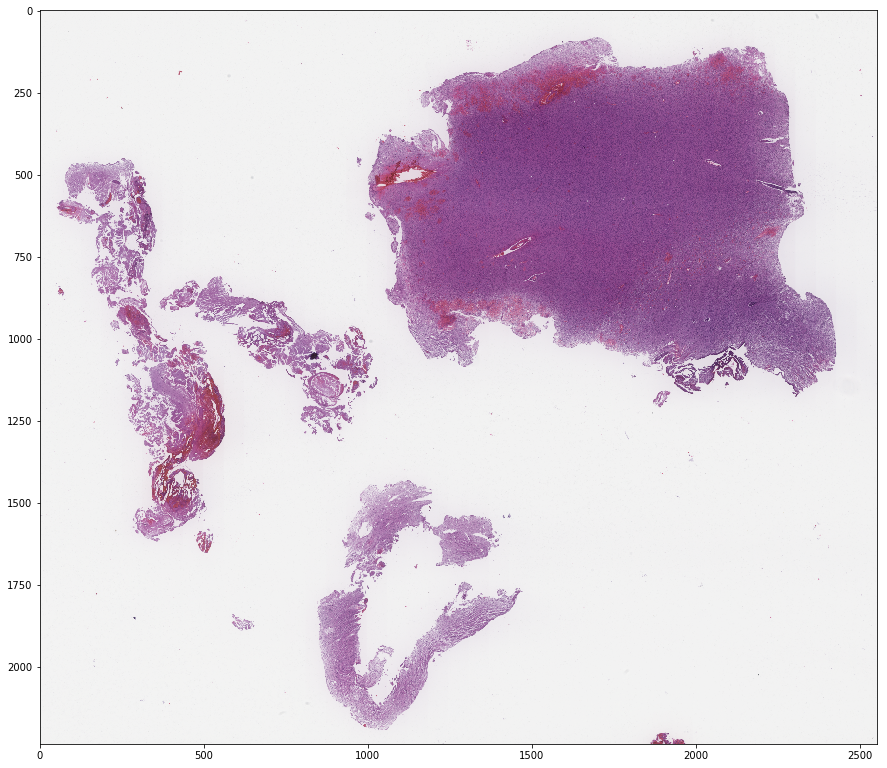

In [6]:
file_stats(GLIOMA_DIR, '132223.svs')

info of one meningioma file

Openslide info:

Level count: 4
Level dimensions: ((59759, 49507), (14939, 12376), (3734, 3094), (1867, 1547))
Level downsamples: (1.0, 4.0002216106542825, 16.00249337920657, 32.00498675841314)
Dimensions: (59759, 49507)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7F63FB0F2470>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7F63FB0F24E0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=927x768 at 0x7F63FB0F2470>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 05/20/18
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 121295
  Property: aperio.Focus Offset, value: -0.000500
  Property: aperio.ICC Profile, value: AT2
  Property: aperio.ImageID, value: 121295
  Property: aperio.Left, value: 32.387527
  Proper

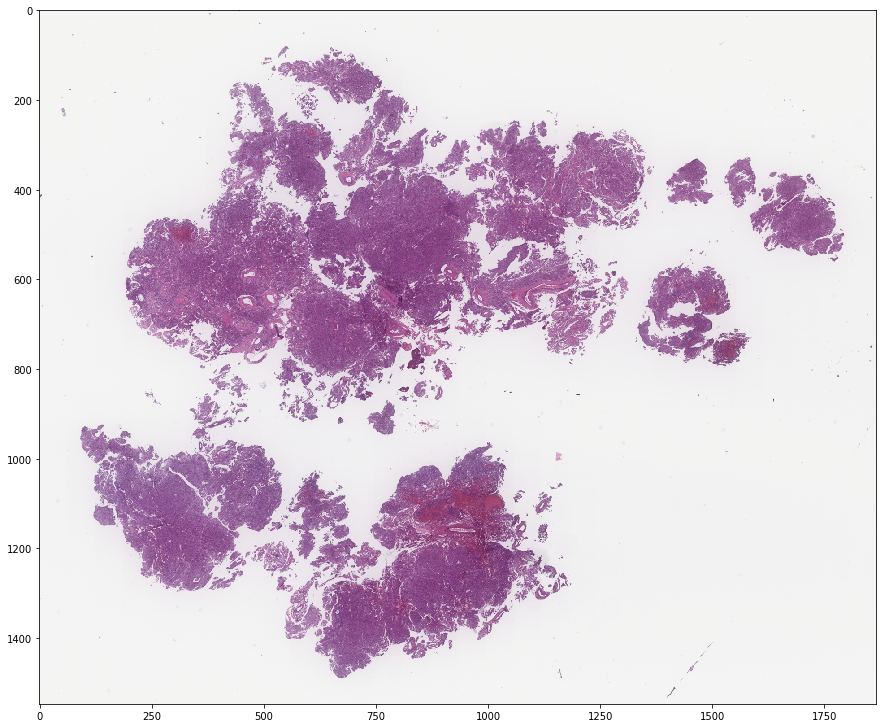

In [7]:
file_stats(MENINGIOMA_DIR, '122403.svs')

## Process

TODO:
2. color augmentation
3. random crops

In [8]:
# press shift+tab to see function definition
multiprocessing_pipeline(GLIOMA_DIR, turtle_glioma.files, tile_size=1024, zoom_level=0)

================START================
/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132223.svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132223.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132217.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132225.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132214.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132224.svs
Opening Slide #2: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132217.svs
Opening Slide #3: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132225.svs
Opening Slide #4: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132214.svs
Opening Slide #5: /media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/132224.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/
Number of processes: 5
Number of tr

In [10]:
multiprocessing_pipeline(MENINGIOMA_DIR, turtle_meningioma.files, tile_size=1024, zoom_level=0)

================START================
/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122403.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122468.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122401.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122889.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122433.svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122403.svs
Opening Slide #4: /media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122468.svs
Opening Slide #2: /media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122401.svs
Opening Slide #3: /media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122433.svs
Opening Slide #5: /media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/122889.svs
/media/disk1/mingrui-projects/py

## Post Process
Move images to train and val folders

In [26]:
glioma_tile_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/IDH_sample/tiles_png'
meningioma_tile_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/Meningioma_sample/tiles_png'

train_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/tumor-classification-data/train'
val_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/tumor-classification-data/val'

train_glioma_dir = os.path.join(train_dir, 'glioma')
train_meningioma_dir = os.path.join(train_dir, 'meningioma')

val_glioma_dir = os.path.join(val_dir, 'glioma')
val_meningioma_dir = os.path.join(val_dir, 'meningioma')

In [22]:
all_glioma_png = glob.glob(os.path.join(glioma_tile_dir, '*', '*'), recursive=True)
len(all_glioma_png)

all_meningioma_png = glob.glob(os.path.join(meningioma_tile_dir, '*', '*'), recursive=True)
len(all_meningioma_png)

shuffle(all_glioma_png)
shuffle(all_meningioma_png)

250

250

In [31]:
# for img in all_glioma_png[:200]:
#     shutil.move(img, train_glioma_dir)
    
# for img in all_glioma_png[200:]:
#     shutil.move(img, val_glioma_dir)

# for img in all_meningioma_png[:200]:
#     shutil.move(img, train_meningioma_dir)
    
# for img in all_meningioma_png[200:]:
#     shutil.move(img, val_meningioma_dir)